### Python을 활용한 이원배치 분산분석 
> 함수 사용법
Python으로 양방향 ANOVA를 수행하는 훨씬 더 쉬운 방법이 있습니다. <br>
많은 R- 패키지 (예 : lm)와 유사한 모델 표기법을 가진 Statsmodel을 사용할 수 있습니다. 모델의 공식화부터 시작합니다.

- formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
- model = ols(formula, data).fit()
- aov_table = anova_lm(model, typ=2)


> <b>함수 사용 예제</b> <br><br>
Python에 내장된 mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. <br>
am변수는 변속기 종류이며, cyl변수는 실린더 개수를 의미한다. 데이터를 분석에 적절한 형태로 처리한 후, <br>변속기 종류(am변수)와 실린더 개수(cyl)에 따라 주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 <br>이원 분산분석을 수행하고, 그 결과를 해석해보자 

- 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다. 
<br> 
<br> 

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다. <br>
2) 대립가설 H1: 실린더 개수에 따른 주행거리의 차이는 존재한다. <br> 
3) 귀무가설 H0: 변속기 종류에 따른 주행거리의 차이는 존재하지 않는다. <br>
4) 대립가설 H1: 변속기 종류에 따른 주행거리의 차이는 존재한다. <br> 
<br> 



----------------------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# 데이터 불러오기
mtcars = pd.read_csv('./data/mtcars.csv')

In [3]:
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [4]:
mtcars.cyl.value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [5]:
mtcars.am.value_counts()

0    19
1    13
Name: am, dtype: int64

In [6]:
mtcars.mpg.value_counts()

21.0    2
19.2    2
30.4    2
22.8    2
15.2    2
10.4    2
21.4    2
33.9    1
19.7    1
15.8    1
26.0    1
27.3    1
13.3    1
15.5    1
21.5    1
24.4    1
14.3    1
32.4    1
14.7    1
18.7    1
18.1    1
17.3    1
16.4    1
17.8    1
15.0    1
Name: mpg, dtype: int64

In [9]:
## 독립변수 cyl, am과 종속변수 mgp를 Series로 변경
cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
print(type(cyl), type(am))

## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성
mtcars = mtcars[['mpg','am','cyl']]

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [10]:
mtcars

,mpg,am,cyl
0,21.0,1,6
1,21.0,1,6
2,22.8,1,4
3,21.4,0,6
4,18.7,0,8
5,18.1,0,6
6,14.3,0,8
7,24.4,0,4
8,22.8,0,4
9,19.2,0,6


<b>2. 분산분석 수행</b>

In [16]:
## 분산분석 수행

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl)*C(am)'
model = ols(formula, mtcars).fit()
anova_table = anova_lm(model, typ=2)

In [17]:
anova_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


- cyl변수에 대한 p-value는 0.05보다 작으므로, 주효과 검정에서 1)귀무가설을 기각한다. 따라서 실린더 개수에 따라 주행거리 간 유의미한 차이는 존재한다고 해석할 수 있다. 
- am변수에 대한 p-value는 0.0561로 0.05보다 크므로, 주효과 검정에서 '변속기 종류에 따른 주행거리 평균간 차이는 존재하지 않는다'는 귀무가설을 기각하지 않는다. 
- cyl변수와 am변수 간의 상호작용 효과에 대한 검정결과, p-value는 0.2686으로 0.05보다 크므로 귀무가설을 기각하지 않는다. 따라서 실린더 개수와 변속기 종류 간에는 교호작용이 존재하지 않는다는 것을 알 수 있다. 

<b>Q2.</b> 실린더 개수와 변속기 종류 사이에 상호작용 효과가 있는지 없는지를 시각화 해주는 상호작용 그래프를 그린 후 이를 해석해보자.

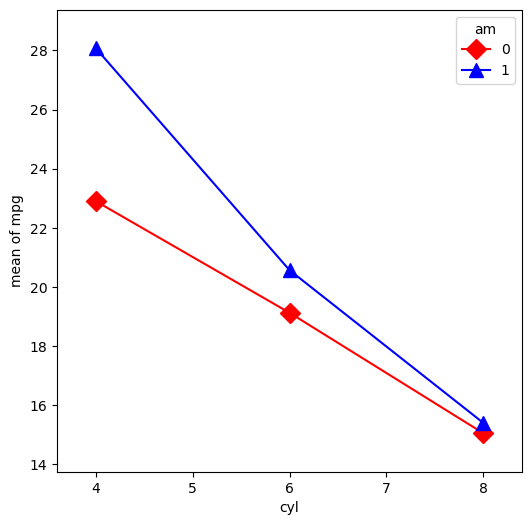

In [23]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
plt.show()

- 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 시에는 x축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다. 